# K-Nearest Neighbors Algorithm (Classification)

 1) Create a K-NN model from scratch 

 2) Use sklearn to implement K-NN 
 
 3) Use sklearn to implement K-NN; use GridSearchCV and RandomizedSearchCV to select hyper-parameters
 
 4) Use sklearn to implement K-NN and mlxtend to plot the desicion boundary

## 1) Create a K-NN model from scratch 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
df = sns.load_dataset("iris")

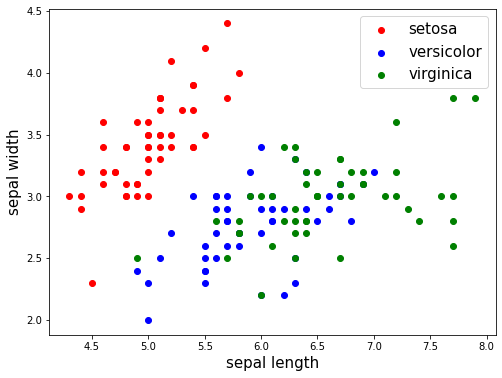

In [4]:
df1 = df[df.species=="setosa"]
df2 = df[df.species=="versicolor"]
df3 = df[df.species=="virginica"]

plt.figure(figsize = (8, 6))

plt.scatter(df1.sepal_length, df1.sepal_width, color="red", label ="setosa")
plt.scatter(df2.sepal_length, df2.sepal_width, color="blue", label="versicolor")
plt.scatter(df3.sepal_length, df3.sepal_width, color="green", label="virginica")
plt.xlabel("sepal length", fontsize=15)
plt.ylabel("sepal width", fontsize=15)
plt.legend(fontsize=15);

In [5]:
X = df[["sepal_length", "sepal_width"]].to_numpy()

y = df["species"].to_numpy()

---

**Remark**: In machine learning we fit the model to the **training data** and we choose optimal hyper-parameters using the **validation data**. Then with those choices of hyper-parameters, we fit the model again to the training data, and we evaluate and report model prformance on the **test data**. 

---

In [6]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [7]:
X_train.shape

(90, 2)

In [8]:
X_valid.shape

(30, 2)

In [9]:
X_test.shape

(30, 2)

In [10]:
# We define Euclidean distance function

def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between X_train[0] and X_train[1] is {distance(X_train[0], X_train[1])}")

The distance between X_train[0] and X_train[1] is 3.026549190084311


In [12]:
# We define a function that will create a list of k nearest neighbors from the training data set to a given test point
# For each such neighbor, this list will store: features of that neighbor, its label, and its distance to the test point

def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):

    neighbors = []
    
    for p, l in zip(training_features, training_labels):
        d = distance(point, p)
        info = [p, l, d]
        neighbors.append(info)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [13]:
# Check the k_nearest_neighbors function for a test data point

k_nearest_neighbors(X_test[3], X_train, y_train, 7)

[[array([6.1, 2.9]), 'versicolor', 0.09999999999999964],
 [array([6.1, 3. ]), 'versicolor', 0.1414213562373093],
 [array([5.9, 3. ]), 'virginica', 0.1414213562373093],
 [array([6.1, 2.8]), 'versicolor', 0.1414213562373093],
 [array([5.9, 3. ]), 'versicolor', 0.1414213562373093],
 [array([6.2, 2.9]), 'versicolor', 0.20000000000000018],
 [array([5.8, 2.8]), 'virginica', 0.22360679774997916]]

In [14]:
y_test[3]

'versicolor'

In [16]:
# We write a function that makes prediction for both classification and regression

def knn_predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    labels = [x[1] for x in neighbors]
    
    if regression == False:
        return max(labels, key = labels.count)
    else:
        return sum(x[1] for x in labels)/k

In [17]:
labels = ['setosa', 'setosa', 'virginica', 'setosa', 'virginica']
max(labels, key = labels.count)

'setosa'

In [18]:
# Check this function

knn_predict(X_test[3], X_train, y_train, 7)

'versicolor'

In [20]:
def accuracy(test_features, 
             test_labels,
             training_features, 
             training_labels,
             k):
    
    correct = 0
    for point, label in zip(test_features, test_labels):
        correct += label == knn_predict(point, 
                                        training_features, 
                                        training_labels, 
                                        k)
    return correct/len(test_features)

In [21]:
# Check  this function

accuracy(X_valid, y_valid, X_train, y_train, 7)

0.6666666666666666

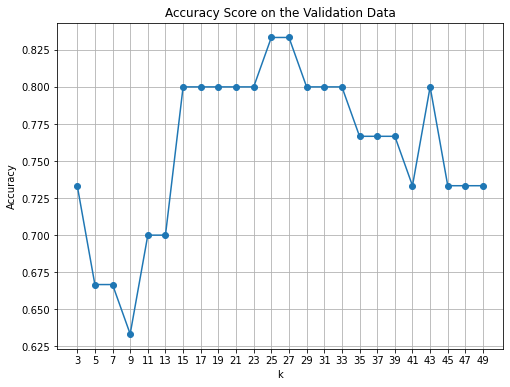

In [22]:
k_values = [k for k in range(3, 50, 2)]
accuracy_values = [accuracy(X_valid,
                            y_valid,
                            X_train,
                            y_train, k) for k in k_values]

plt.figure(figsize = (8, 6))

plt.plot(k_values, accuracy_values, marker = "o")
plt.title('Accuracy Score on the Validation Data')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid();

In [23]:
# We choose the optimal value for k from the above graph, 
# we fit the model again on the training data and 
# we report the error on the test data

accuracy(X_test, y_test, X_train, y_train, 25)

0.9

## 2) Use sklearn to implement K-NN 

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X = df[["sepal_length", "sepal_width"]]
y = df["species"]

In [25]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [26]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [27]:
y_pred = model.predict(X_valid)
y_pred

array(['virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [28]:
accuracy_score(y_valid, y_pred)

0.6333333333333333

In [29]:
cm = confusion_matrix(y_valid, y_pred)
cm

array([[8, 1, 0],
       [0, 8, 5],
       [0, 5, 3]], dtype=int64)

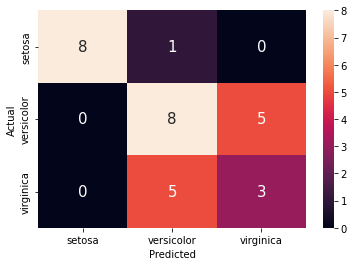

In [30]:
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":15},
           xticklabels=['setosa', 'versicolor', 'virginica'],
           yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [31]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      0.89      0.94         9
  versicolor       0.57      0.62      0.59        13
   virginica       0.38      0.38      0.38         8

    accuracy                           0.63        30
   macro avg       0.65      0.63      0.64        30
weighted avg       0.65      0.63      0.64        30



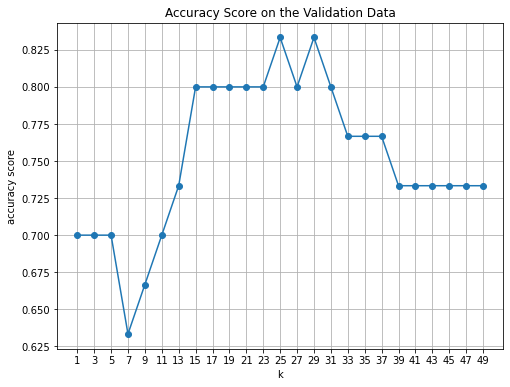

In [32]:
k_values = []
acc_score = []

for k in range(1, 50, 2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_score.append(accuracy_score(y_valid, y_pred))
    k_values.append(k)


plt.figure(figsize = (8, 6))

plt.plot(k_values, acc_score, marker = "o")
plt.title("Accuracy Score on the Validation Data")
plt.xlabel("k")
plt.ylabel("accuracy score")
plt.xticks(k_values)
plt.grid();

In [33]:
m = max(acc_score)
m

0.8333333333333334

In [34]:
k_values[acc_score.index(m)]

25

In [35]:
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

## 3) Use GridSearchCV and RandomizedSearchCV to select hyper-parameters

In [37]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [38]:
X = df[["sepal_length", "sepal_width"]]
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                            X_train, 
                            y_train, 
                            cv=5, # no shuffle, stratified for classifiers, default value 5
                            #cv=KFold(n_splits=5, shuffle=True), 
                            #cv=StratifiedKFold(n_splits=5, shuffle=True),
                            #cv=RepeatedKFold(n_splits=5, n_repeats=3),
                            scoring='accuracy')

cv_scores

array([0.66666667, 0.75      , 0.79166667, 0.70833333, 0.70833333])

[0.67 0.75 0.79 0.71 0.71]
Average accuracy: 0.725
Accuracy standard deviation: 0.042491829279939865


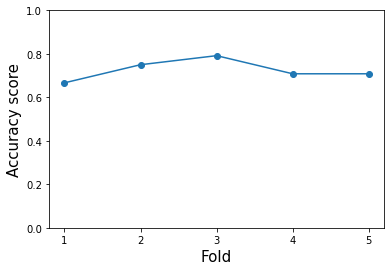

In [40]:
plt.plot(range(1, 6), cv_scores, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,6))

print(np.round(cv_scores,2))
print('Average accuracy:', cv_scores.mean())
print('Accuracy standard deviation:', cv_scores.std());  

In [41]:
gs = GridSearchCV(estimator = KNeighborsClassifier(),
                  param_grid = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]},
                  cv=5)

gs.fit(X_train, y_train)

gs.cv_results_

{'mean_fit_time': array([0.00130339, 0.        , 0.00312362, 0.0062438 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.003123  , 0.        , 0.00312643, 0.003125  ,
        0.        , 0.        , 0.        , 0.        , 0.00312591,
        0.        , 0.00312438, 0.        , 0.        , 0.003125  ,
        0.        , 0.        , 0.00312672, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00312519, 0.00312505,
        0.00312247, 0.00312605, 0.00311036, 0.        , 0.00312405,
        0.00312505, 0.00312457, 0.00314002, 0.00312257, 0.        ,
        0.        , 0.00311112, 0.0031249 , 0.        , 0.00312457,
        0.00312471, 0.00312452, 0.00312471, 0.        , 0.        ,
        0.00312452, 0.00312839, 0.00312471, 0.        , 0.        ,
        0.00312462, 0.00153899, 0.00160923, 0.00099821, 0.        ,
        0.00313878, 0.00312505, 0.00312428, 0.00351896, 0.00027647,
        0.        , 0.        ,

In [43]:
results = pd.DataFrame(gs.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001303,0.000879,0.013766,0.017015,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.708333,0.708333,0.708333,0.750000,0.625000,0.700000,0.040825,190
1,0.000000,0.000000,0.000000,0.000000,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.708333,0.708333,0.708333,0.750000,0.625000,0.700000,0.040825,190
2,0.003124,0.006247,0.000000,0.000000,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.708333,0.708333,0.708333,0.750000,0.625000,0.700000,0.040825,190
3,0.006244,0.007647,0.000000,0.000000,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.708333,0.708333,0.708333,0.750000,0.625000,0.700000,0.040825,190
4,0.000000,0.000000,0.003126,0.006251,2,1,uniform,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}",0.833333,0.750000,0.666667,0.708333,0.708333,0.733333,0.056519,143


In [44]:
results[["param_n_neighbors", "param_weights", "param_p", "mean_test_score", "rank_test_score"]].head(10)

,param_n_neighbors,param_weights,param_p,mean_test_score,rank_test_score
0,1,uniform,1,0.700000,190
1,1,distance,1,0.700000,190
2,1,uniform,2,0.700000,190
3,1,distance,2,0.700000,190
4,2,uniform,1,0.733333,143
5,2,distance,1,0.683333,199
6,2,uniform,2,0.708333,181
7,2,distance,2,0.683333,199
8,3,uniform,1,0.708333,179
9,3,distance,1,0.700000,190


In [45]:
gs.best_score_

0.8166666666666668

In [46]:
gs.best_params_

{'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}

In [47]:
y_pred = gs.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

In [48]:
rs = RandomizedSearchCV(estimator = KNeighborsClassifier(),
                        param_distributions = {"n_neighbors": range(1,51),
                                               "weights": ['uniform', 'distance'],
                                               "p": [1,2]},
                        cv=5,
                        n_iter=10)

rs.fit(X_train, y_train)

rs.best_score_

0.7666666666666667

In [49]:
rs.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 18}

In [50]:
y_pred = rs.predict(X_test)
accuracy_score(y_test, y_pred)

0.7666666666666667

##  4) Use sklearn to implement K-NN and mlxtend to plot the desicion boundary

In [ ]:
#pip install mlxtend

In [51]:
from mlxtend.plotting import plot_decision_regions

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
k=50                     # try k=50
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [59]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9333333333333333

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


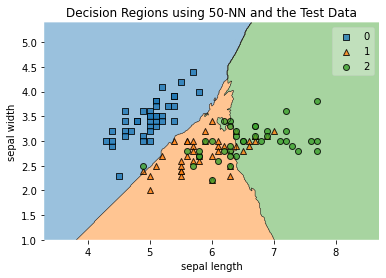

In [61]:
plot_decision_regions(X_train.to_numpy(), y_train, clf = model) # change to test data
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title(f"Decision Regions using {k}-NN and the Test Data");